<a href="https://colab.research.google.com/github/mikonvergence/ControlNetInpaint/blob/main/ControlNet-with-Inpaint-Demo-colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 💡 Note
If you're running this on colab, you might want to only run individual sections of this notebook corresponding to a specific type of model to avoid running out of memory.

In [ ]:
! pip install lmdb
! pip install torch==2.0.1+cu118 torchvision==0.15.2+cu118 torchaudio==2.0.2 torchtext==0.15.2+cpu torchdata==0.6.1 --index-url https://download.pytorch.org/whl/cu118

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 5.0 MB/s eta 0:00:00
Looking in indexes: https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 GB 744.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 86.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 91.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 81.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 92.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 MB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.3/132.3 kB 16.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lit: filename=lit-15.0.7-py3-none-any.whl size=89990 sha256=5b378642b282b9c3e0518b64d9a2002c8e8a59e24a4c642031d1d697ce901da9
  Stored in directory: /root/.cache/pip/wheels/27/2c/b6/3ed2983b1b44fe0dea1bb35234b09f2c22fb8ebb308679c922
Succes

In [ ]:
! pip install diffusers==0.14.0 xformers transformers scipy ftfy accelerate controlnet_aux

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 737.4/737.4 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.8/211.8 MB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.4/202.4 kB 16.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 43.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 62.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 82.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 

In [ ]:
! git clone https://github.com/mikonvergence/ControlNetInpaint
import sys
sys.path.append('./ControlNetInpaint/')

Cloning into 'ControlNetInpaint'...
remote: Enumerating objects: 82, done.
remote: Counting objects: 100% (82/82), done.
remote: Compressing objects: 100% (68/68), done.
remote: Total 82 (delta 31), reused 50 (delta 13), pack-reused 0
Receiving objects: 100% (82/82), 15.05 MiB | 19.99 MiB/s, done.
Resolving deltas: 100% (31/31), done.


# Inpainting with ControlNet
This notebook contains examples of using a new `StableDiffusionControlNetInpaintPipeline`.

The main two parameters you can play with are the strength of text guidance and image guidance:
* Text guidance (`guidance_scale`) is set to `7.5` by default, and usually this value works quite well.
* Image guidance (`controlnet_conditioning_scale`) is set to `0.4` by default. This value is a good starting point, but can be lowered if there is a big misalignment between the text prompt and the control image (meaning that it is very hard to "imagine" an output image that both satisfies the text prompt and aligns with the control image).

The naming of these parameters is based on other pipelines `StableDiffusionInpaintPipeline` and `StableDiffusionControlNetPipeline` and the same convention has been preserved for consistency.

In [ ]:
from diffusers import StableDiffusionInpaintPipeline, ControlNetModel, UniPCMultistepScheduler
from src.pipeline_stable_diffusion_controlnet_inpaint import *
from diffusers.utils import load_image

import cv2
from PIL import Image, ImageDraw, ImageFont
import numpy as np
import torch
from matplotlib import pyplot as plt

### Baseline: Stable Diffusion 1.5 Inpainting
The StableDiffusion1.5 Inpainting model is used as the core for ControlNet inpainting. For reference, you can also try to run the same results on this core model alone:

In [ ]:
pipe_sd = StableDiffusionInpaintPipeline.from_pretrained(
    "runwayml/stable-diffusion-inpainting",
    revision="fp16",
    torch_dtype=torch.float16,
    safety_checker=None
)
# speed up diffusion process with faster scheduler and memory optimization
pipe_sd.scheduler = UniPCMultistepScheduler.from_config(pipe_sd.scheduler.config)
# remove following line if xformers is not installed
pipe_sd.enable_xformers_memory_efficient_attention()

pipe_sd.to('cuda')

model_index.json:   0%|          | 0.00/550 [00:00<?, ?B/s]

safety_checker/model.safetensors not found


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

text_encoder/config.json:   0%|          | 0.00/635 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.75k [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/821 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/613 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/810 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/608M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/246M [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/167M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion_inpaint.StableDiffusionInpaintPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


StableDiffusionInpaintPipeline {
  "_class_name": "StableDiffusionInpaintPipeline",
  "_diffusers_version": "0.14.0",
  "feature_extractor": [
    "transformers",
    "CLIPFeatureExtractor"
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "DDIMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [ ]:
# load control net and stable diffusion v1-5
controlnet = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-canny", torch_dtype=torch.float16)
pipe = StableDiffusionControlNetInpaintPipeline.from_pretrained(
     "runwayml/stable-diffusion-inpainting",
     controlnet=controlnet,
     torch_dtype=torch.float16,
     safety_checker=None
 )

# speed up diffusion process with faster scheduler and memory optimization
pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)
# remove following line if xformers is not installed
pipe.enable_xformers_memory_efficient_attention()

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.45G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/920 [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

safety_checker/model.safetensors not found


Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/748 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.78k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/335M [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/492M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

You have disabled the safety checker for <class 'src.pipeline_stable_diffusion_controlnet_inpaint.StableDiffusionControlNetInpaintPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


### Task
This will transfer a text into an existing image.

Text(0.5, 1.0, 'Masked')

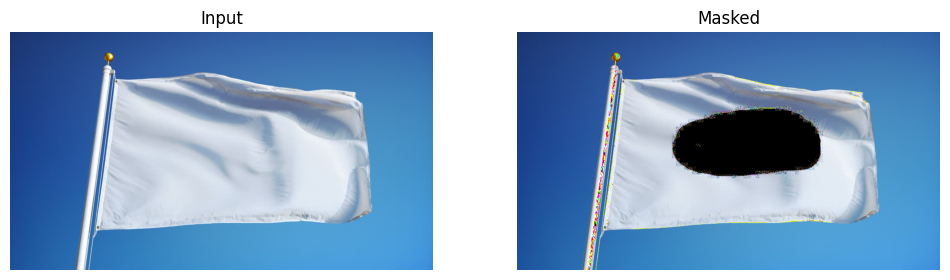

In [ ]:
# download an image
image = load_image(
     "/content/flag.jpg"
)
image = np.array(image)

mask_image = load_image(
     "/content/mask.jpg"
)
mask_size = mask_image.size
mask_image = np.array(mask_image)

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.imshow(image)
plt.axis('off')
plt.title('Input')
plt.subplot(1,2,2)
plt.imshow((255-np.array(image))*(255-np.array(mask_image)))
plt.axis('off')
plt.title('Masked')

####Generate the text image

In [ ]:
def generate_text_image(text, font_path, image_size, bounding_box, font_size=50, text_color=(0, 0, 0)):
    img = Image.new('RGB', image_size, color='white')

    lines = text.split("\n")

    draw = ImageDraw.Draw(img)

    min_x, min_y, max_x, max_y = bounding_box

    # find the suitable font size
    for i in range(1, 1000):
        font_size = i
        font = ImageFont.truetype(font_path, size=font_size)
        text_width = draw.textlength(max(lines, key=len), font=font)
        text_height = font_size * len(lines)
        if not ((text_width < (max_x - min_x) - 50) and (text_height < (max_y - min_y) - 50)):
            break
    print(f"chose font size: {font_size}")

    placement = (min_x + ((max_x - min_x) // 2 - text_width // 2), \
        min_y + ((max_y - min_y) // 2 - text_height // 2))

    draw.text(placement, text, fill=text_color, font=font)

    return img

In [ ]:
# download some fonts
! apt-get install -y fonts-ttf-mscorefonts-installer
! apt-get install -y fonts-open-sans

# get a font path by its name
import subprocess

def get_font_path(font_name):
  output = subprocess.check_output(['fc-list']).decode('utf-8')

  font_path = None

  for line in output.splitlines():
      if font_name in line:
          font_path = line.split(":")[0]
          break

  return font_path

! fc-list

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package fonts-ttf-mscorefonts-installer
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-open-sans
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 635 kB of archives.
After this operation, 2,890 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-open-sans all 1.11-2 [635 kB]
Fetched 635 kB in 1s (1,206 kB/s)
Selecting previously unselected package fonts-open-sans.
(Reading database ... 120899 files and directories currently installed.)
Preparing to unpack .../fonts-open-sans_1.11-2_all.deb ...
Unpacking fonts-open-sans (1.11-2) ...
Setting up fonts-open-sans (1.11-2) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
/usr/share/fonts/truetype/open-sans/OpenSans-Light.ttf: Ope

chose font size: 82


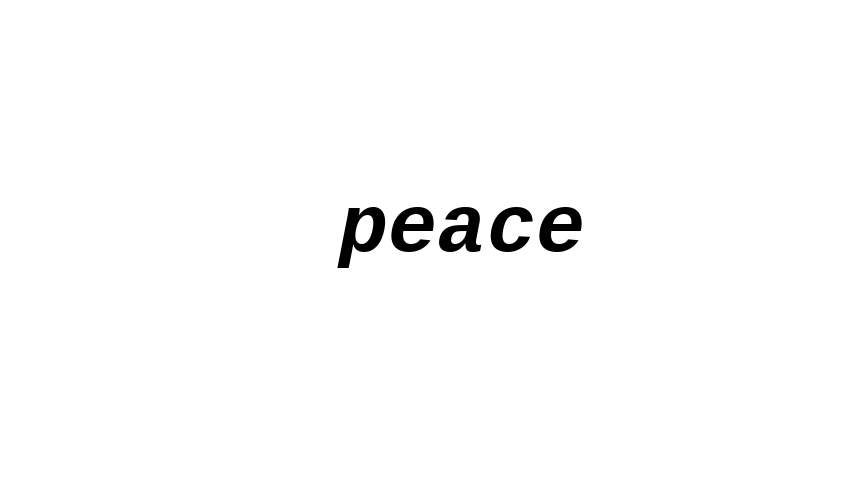

In [ ]:
user_text = "peace"
user_font_path = get_font_path("LiberationMono-Bold")

white_pixels = np.where(mask_image == 255)
min_x = np.min(white_pixels[1])
max_x = np.max(white_pixels[1])
min_y = np.min(white_pixels[0])
max_y = np.max(white_pixels[0])
bounding_box = (min_x, min_y, max_x, max_y)

text_image = generate_text_image(user_text, user_font_path, mask_size, bounding_box)
text_image

#### run this part if you want to build the canny using an image

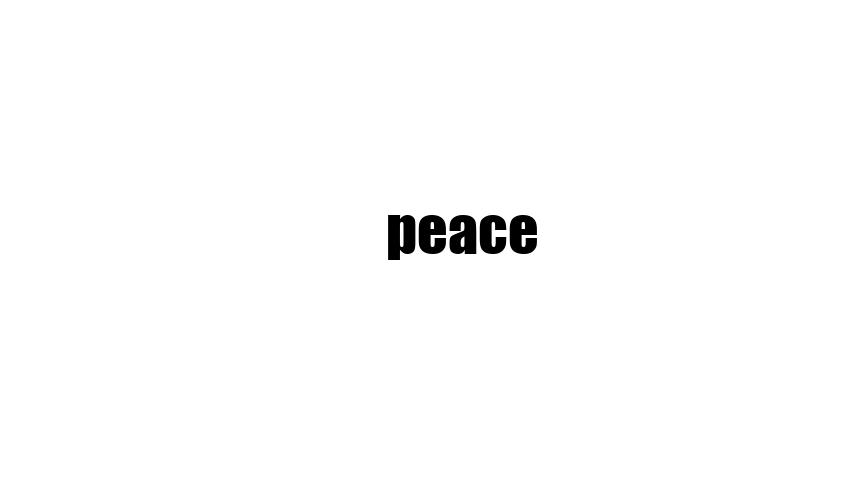

In [ ]:
text_image = load_image(
     "/content/text.jpg"
)
text_image

## Canny Edge

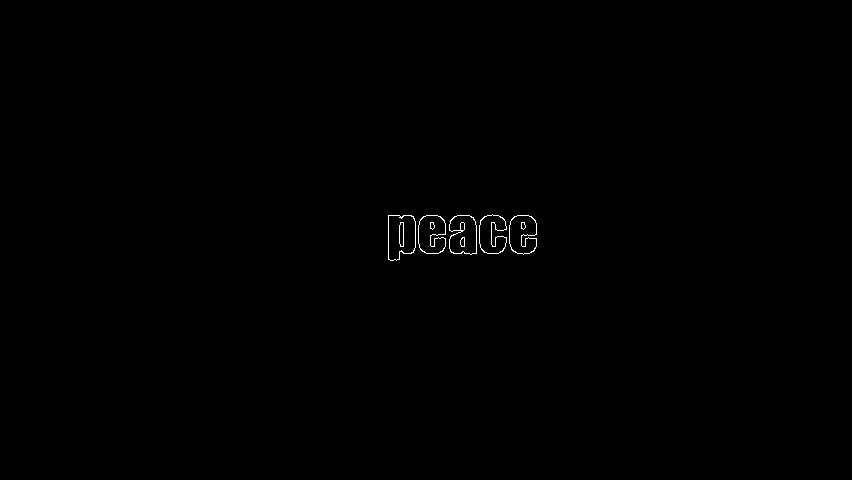

In [ ]:
# get canny image
text_image = np.array(text_image)

canny_image = cv2.Canny(text_image, 100, 200)
canny_image = canny_image[:, :, None]
canny_image = np.concatenate([canny_image, canny_image, canny_image], axis=2)

image=Image.fromarray(image)
mask_image=Image.fromarray(mask_image)
canny_image = Image.fromarray(canny_image)

canny_image

### run this part in case you want to use an existing canny

In [ ]:
canny_image = load_image(
     "/content/canny.jpg"
)
image=Image.fromarray(image)
mask_image=Image.fromarray(mask_image)
canny_image

### Scaling image control
The conditioning scale must be tuned manually at this stage

  0%|          | 0/20 [00:00<?, ?it/s]

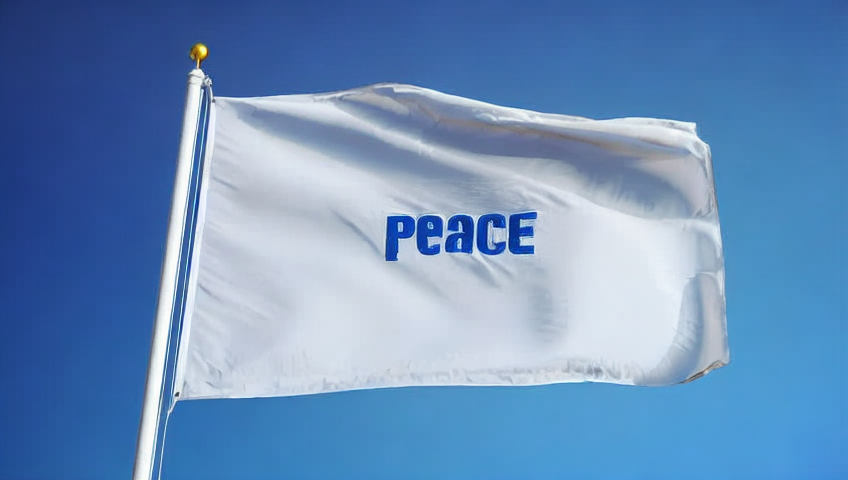

In [ ]:
pipe.to('cuda')

text_prompt = "a white flag with peace printed on it"

# generate image
generator = torch.manual_seed(5)
new_image = pipe(
    text_prompt,
    negative_prompt="poor quality, bad, worst, gibberish, unnatural, patched, cropped, flat, extra words, unrealistic, fade",
    num_inference_steps=20,
    generator=generator,
    image=image,
    control_image=canny_image,
    controlnet_conditioning_scale = 0.5,
    mask_image=mask_image
).images[0]

new_image

#### Testing the Vanilla SD output

In [ ]:
image = load_image(
     "/content/wall2.jpg"
)

mask_image = load_image(
     "/content/mask.jpg"
)

canny_image = image

pipe.to('cuda')

text_prompt = "a white wall with Hello World written on it"

# generate image
generator = torch.manual_seed(5)
new_image = pipe(
    text_prompt,
    negative_prompt="poor quality, bad, worst, gibberish, unnatural, patched, cropped, flat, extra words, unrealistic, fade",
    num_inference_steps=20,
    generator=generator,
    image=image,
    control_image=canny_image,
    controlnet_conditioning_scale = 0,
    mask_image=mask_image
).images[0]

new_image

ValueError: ignored

## HED

In [ ]:
from controlnet_aux import HEDdetector

hed = HEDdetector.from_pretrained('lllyasviel/ControlNet')

hed_image = hed(image)

In [ ]:
controlnet = ControlNetModel.from_pretrained(
    "fusing/stable-diffusion-v1-5-controlnet-hed", torch_dtype=torch.float16
)
pipe = StableDiffusionControlNetInpaintPipeline.from_pretrained(
     "runwayml/stable-diffusion-inpainting", controlnet=controlnet, torch_dtype=torch.float16
 )

pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)

# Remove if you do not have xformers installed
# see https://huggingface.co/docs/diffusers/v0.13.0/en/optimization/xformers#installing-xformers
# for installation instructions
pipe.enable_xformers_memory_efficient_attention()

In [ ]:
pipe.to('cuda')

# generate image
generator = torch.manual_seed(0)
new_image = pipe(
    text_prompt,
    num_inference_steps=20,
    generator=generator,
    image=image,
    control_image=hed_image,
    mask_image=mask_image
).images[0]

new_image

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,4,1)
plt.imshow(image)
plt.axis('off')
plt.title('Input')
plt.subplot(1,4,2)
plt.imshow((255-np.array(image))*(255-np.array(mask_image)))
plt.axis('off')
plt.title('Masked')
plt.subplot(1,4,3)
plt.imshow(hed_image)
plt.axis('off')
plt.title('Condition')
plt.subplot(1,4,4)
plt.imshow(new_image)
plt.title('Output')
plt.axis('off')